In [1]:
!pip install opencv-contrib-python
!pip install matplotlib
!pip install pandas
!pip install scikit-learn
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
print(tf.__version__)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/anaconda3/envs/tf215/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/anaconda3/envs/tf215/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/envs/tf215/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/envs/tf215/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start

2.20.0


In [2]:
dataset_path = "/Users/brijesh/Desktop/AI_DermalScan/data/raw"  # Folder containing 4 class folders

# to get all class folders
classes = [f for f in os.listdir(dataset_path) 
           if os.path.isdir(os.path.join(dataset_path, f))]

#count images in each class and store in pandas DataFrame
data = []
for c in classes:
    folder = os.path.join(dataset_path, c)
    num_images = len([f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    data.append({'Class': c, 'Count': num_images})

df = pd.DataFrame(data)

In [3]:
df

,Class,Count
0,clear skin,300
1,dark spots,303
2,wrinkles,300
3,puffy eyes,300


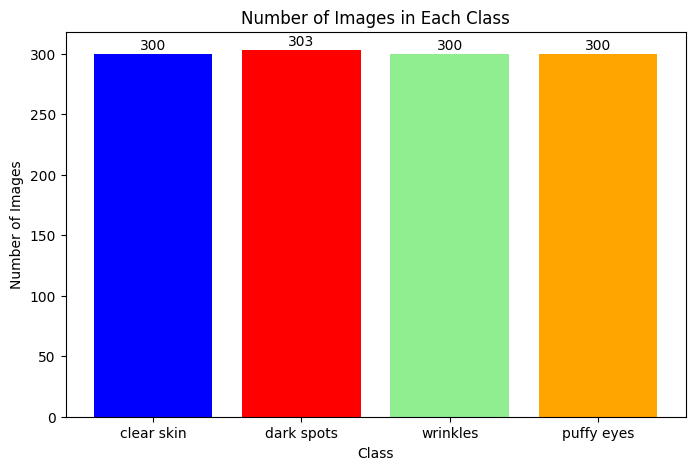

In [4]:
plt.figure(figsize=(8,5))
plt.bar(df['Class'], df['Count'], color=['blue', 'red', 'lightgreen', 'orange'])
plt.title("Number of Images in Each Class")
plt.xlabel("Class")
plt.ylabel("Number of Images")

#count labels on top of bars
for i, count in enumerate(df['Count']):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.show()

In [5]:
def process_image(img_path,target_size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    img = img.astype("float32") / 255.0  # normalize
    return img

In [6]:
img = process_image("/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_002.jpg")

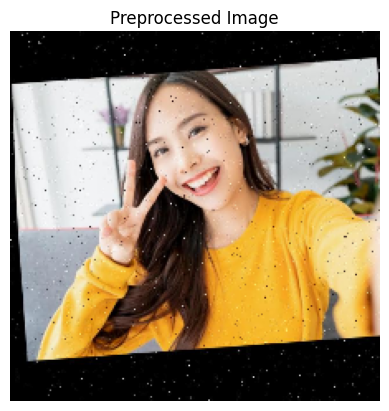

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()

In [8]:
img.shape

(224, 224, 3)

In [9]:
img[:2, :2]  # prints first 2×2 pixels

array([[[0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.2)
])

In [11]:
def augment_image(img_path, num_aug=3):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img.astype("float32") / 255.0

    img_batch = tf.expand_dims(img, 0)

    augmented_images = []
    for i in range(num_aug):
        aug = data_augmentation(img_batch, training=True)
        aug = tf.squeeze(aug).numpy()
        augmented_images.append(aug)

    return img, augmented_images


In [12]:
def show_augmentation_multiple(image_paths, num_aug=3):

    # split by comma
    paths = [p.strip() for p in image_paths.split(",")]

    for img_path in paths:
        print(f"\nProcessing: {img_path}\n")

        original, augmented_list = augment_image(img_path, num_aug)

        plt.figure(figsize=(15, 5))

        # Show original
        plt.subplot(1, num_aug + 1, 1)
        plt.imshow(original)
        plt.axis("off")
        plt.title("Original")

        # Show augmentations
        for i, aug in enumerate(augmented_list):
            plt.subplot(1, num_aug + 1, i + 2)
            plt.imshow(aug)
            plt.axis("off")
            plt.title(f"Augmented {i+1}")

        plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0973011].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0524142].



Processing: /Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_002.jpg



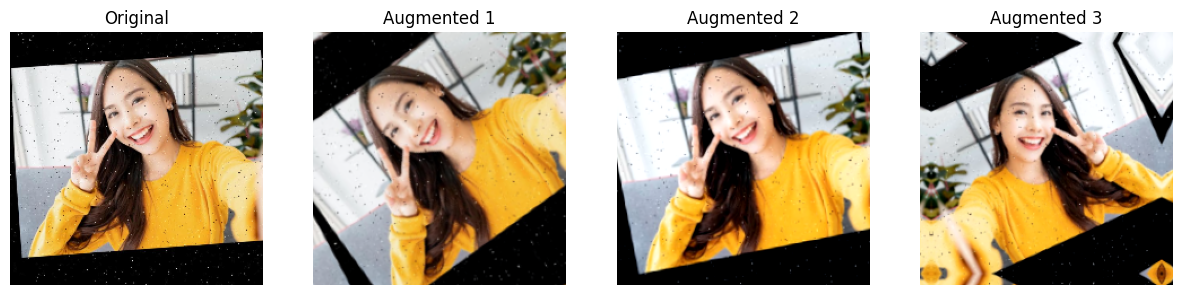

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0215092].



Processing: /Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_003.jpg



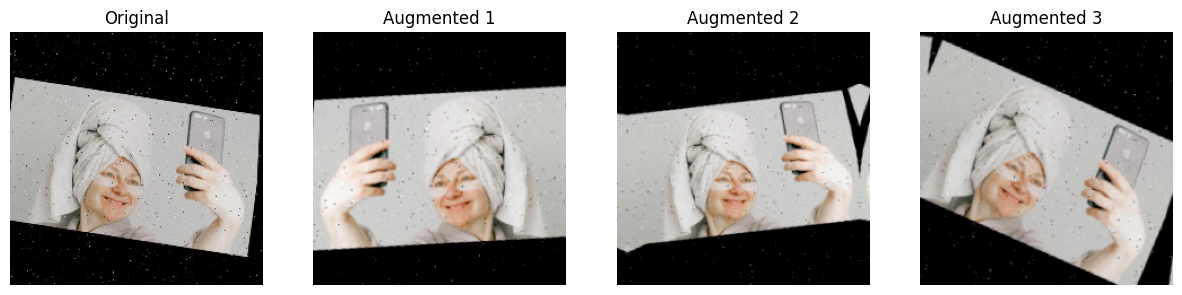

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0266587].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0110304].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0139961].



Processing: /Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_004.jpg



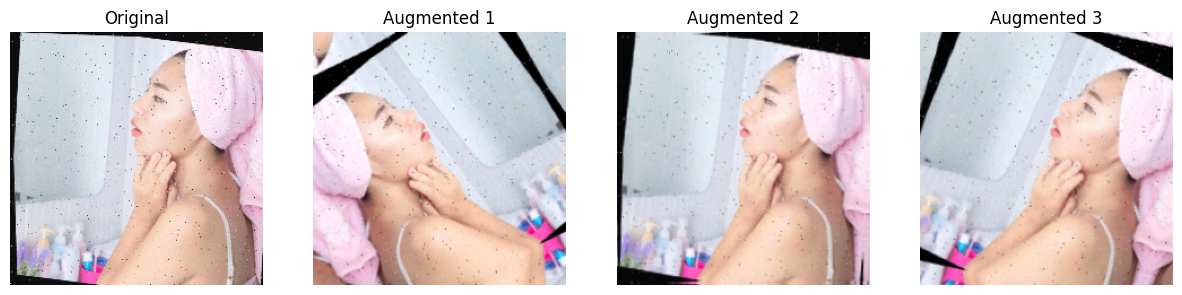

In [13]:
show_augmentation_multiple(
    "/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_002.jpg, "
    "/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_003.jpg, "
    "/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_004.jpg",
    num_aug=3
)

In [15]:
def load_dataset(path, img_size=224, batch_size=32):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        image_size=(img_size, img_size),
        label_mode="categorical",  # one-hot encoding
        shuffle=True
    )

    # Normalize images
    normalization = tf.keras.layers.Rescaling(1.0 / 255)
    dataset = dataset.map(lambda x, y: (normalization(x), y))
    return dataset


In [16]:
# Load dataset
train_data = load_dataset("/Users/brijesh/Desktop/AI_DermalScan/data/raw", img_size=224, batch_size=1)  #batchsize=1 to see the labels clearly

# Print one-hot labels for each image
for images, labels in train_data.take(10):  # take first 10 images
    print(labels.numpy())

Found 1203 files belonging to 4 classes.
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.

2025-12-22 22:37:23.654152: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: known incorrect sRGB profile
2025-12-22 22:37:23.654188: W tensorflow/core/lib/png/png_io.cc:95] PNG warning: iCCP: cHRM chunk does not match sRGB
2025-12-22 22:37:23.673561: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [17]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [18]:
def split_dataset(raw_dir, out_dir="data",
                  train_ratio=0.7, val_ratio=0.15, seed=42):

    # Get only folders
    classes = [
        d for d in os.listdir(raw_dir)
        if os.path.isdir(os.path.join(raw_dir, d))
    ]

    #Create train, val, test folders
    for split in ["train", "val", "test"]:
        for cls in classes:
            os.makedirs(os.path.join(out_dir, split, cls), exist_ok=True)

    
    for cls in classes:
        class_path = os.path.join(raw_dir, cls)

        # Get image files only
        images = [
            os.path.join(class_path, f)
            for f in os.listdir(class_path)
            if f.lower().endswith((".jpg", ".jpeg", ".png"))
        ]

        # Split images
        train_val, test = train_test_split(
            images, test_size=1 - (train_ratio + val_ratio),
            random_state=seed, shuffle=True
        )

        train, val = train_test_split(
            train_val,
            test_size=val_ratio / (train_ratio + val_ratio),
            random_state=seed, shuffle=True
        )

        #Copy files to new folders
        for f in train:
            shutil.copy(f, os.path.join(out_dir, "train", cls))

        for f in val:
            shutil.copy(f, os.path.join(out_dir, "val", cls))

        for f in test:
            shutil.copy(f, os.path.join(out_dir, "test", cls))

    print("Dataset successfully split into Train, Val, and Test")


In [19]:
split_dataset("/Users/brijesh/Desktop/AI_DermalScan/data/raw",
              out_dir="/Users/brijesh/Desktop/AI_DermalScan/data")


Dataset successfully split into Train, Val, and Test


In [20]:
import os
import pandas as pd

def count_split_images(base_dir):
    splits = ["train", "val", "test"]
    data = []

    for split in splits:
        split_path = os.path.join(base_dir, split)

        # All class folders
        classes = [
            c for c in os.listdir(split_path)
            if os.path.isdir(os.path.join(split_path, c))
        ]

        for cls in classes:
            class_path = os.path.join(split_path, cls)

            num_images = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith((".jpg", ".jpeg", ".png"))
            ])

            data.append([split, cls, num_images])

    df = pd.DataFrame(data, columns=["Split", "Class", "Count"])
    return df


In [21]:
df_counts = count_split_images("/Users/brijesh/Desktop/AI_DermalScan/data")
print(df_counts)


    Split       Class  Count
0   train   .DS_Store      0
1   train  clear skin    209
2   train  dark spots    211
3   train    wrinkles    209
4   train  puffy eyes    209
5     val   .DS_Store      0
6     val  clear skin     45
7     val  dark spots     46
8     val    wrinkles     45
9     val  puffy eyes     45
10   test   .DS_Store      0
11   test  clear skin     46
12   test  dark spots     46
13   test    wrinkles     46
14   test  puffy eyes     46


In [22]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_grouped_bar(df):
    # Remove DS_Store rows
    df = df[df["Class"] != ".DS_Store"]

    # Pivot for grouped chart
    pivot_df = df.pivot(index="Class", columns="Split", values="Count")

    # Plot
    pivot_df.plot(kind="bar", figsize=(10, 7))

    plt.title("Image Count per Class in Each Split")
    plt.xlabel("Class")
    plt.ylabel("Number of Images")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


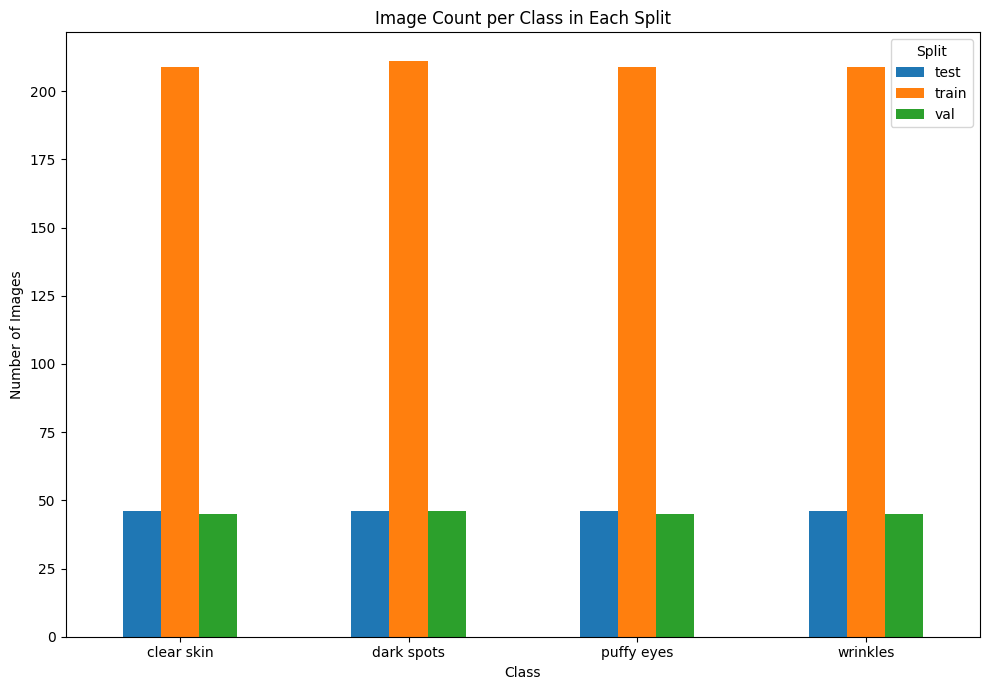

In [23]:
plot_grouped_bar(df_counts)


In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [25]:
train_dir = "/Users/brijesh/Desktop/AI_DermalScan/data/train"
val_dir   = "/Users/brijesh/Desktop/AI_DermalScan/data/val"
test_dir  = "/Users/brijesh/Desktop/AI_DermalScan/data/test"

In [26]:
def remove_ds_store(path):
    for root, dirs, files in os.walk(path):           #remove .DS_Store class from all folders
        if ".DS_Store" in files:
            os.remove(os.path.join(root, ".DS_Store"))

remove_ds_store(train_dir)
remove_ds_store(val_dir)
remove_ds_store(test_dir)

In [27]:
def get_classes(path):      #load Classes Without .DS_Store class
    return sorted([d for d in os.listdir(path) if d != ".DS_Store"])    

In [28]:
train_gen = ImageDataGenerator(      #Data Generators
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.25,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3]
)

val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

In [29]:
train_data = train_gen.flow_from_directory(   #load data
    train_dir,
    classes=get_classes(train_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

val_data = val_gen.flow_from_directory(
    val_dir,
    classes=get_classes(val_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_gen.flow_from_directory(
    test_dir,
    classes=get_classes(test_dir),
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

num_classes = len(train_data.class_indices)
print("Classes =", train_data.class_indices)

Found 838 images belonging to 4 classes.
Found 181 images belonging to 4 classes.
Found 184 images belonging to 4 classes.
Classes = {'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}


In [30]:
base_model = MobileNetV2(     #building MobilenetV2 model
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False

In [31]:
x = GlobalAveragePooling2D()(base_model.output)  #classifier
x = Dropout(0.4)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.3)(x)

output = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

In [32]:
model.compile(     #compilation
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,586,948 (9.87 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [33]:
history = model.fit(    #first TRAINING
    train_data,
    validation_data=val_data,
    epochs=20,
    verbose=1
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 215ms/step - accuracy: 0.3556 - loss: 1.5810 - val_accuracy: 0.5746 - val_loss: 1.0025
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.5525 - loss: 1.1055 - val_accuracy: 0.6961 - val_loss: 0.7816
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 194ms/step - accuracy: 0.6444 - loss: 0.8810 - val_accuracy: 0.7459 - val_loss: 0.6871
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 196ms/step - accuracy: 0.6659 - loss: 0.8148 - val_accuracy: 0.7569 - val_loss: 0.6317
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.7243 - loss: 0.7431 - val_accuracy: 0.7680 - val_loss: 0.5937
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.7220 - loss: 0.7304 - val_accuracy: 0.7680 - val_loss: 0.5758
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.7542 - loss: 0.6220 - val_accuracy: 0.7735 - val_loss: 0.5572
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.7542 - loss: 0.6401 - val_accuracy: 0.

In [34]:
print("INITIAL TRAIN ACCURACY =", history.history["accuracy"][-1])
print("INITIAL VALIDATION ACCURACY   =", history.history["val_accuracy"][-1])

INITIAL TRAIN ACCURACY = 0.8162291049957275
INITIAL VALIDATION ACCURACY   = 0.8066298365592957


In [36]:
#for more better accuracy i did this

#parameter-tuning step (after first training)
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    verbose=2
)

Epoch 1/20
27/27 - 11s - 399ms/step - accuracy: 0.8711 - loss: 0.3581 - val_accuracy: 0.8619 - val_loss: 0.3495
Epoch 2/20
27/27 - 7s - 259ms/step - accuracy: 0.8914 - loss: 0.3194 - val_accuracy: 0.8785 - val_loss: 0.3379
Epoch 3/20
27/27 - 7s - 266ms/step - accuracy: 0.8807 - loss: 0.3327 - val_accuracy: 0.8729 - val_loss: 0.3416
Epoch 4/20
27/27 - 7s - 266ms/step - accuracy: 0.8711 - loss: 0.3090 - val_accuracy: 0.8785 - val_loss: 0.3336
Epoch 5/20
27/27 - 7s - 272ms/step - accuracy: 0.8890 - loss: 0.3003 - val_accuracy: 0.8785 - val_loss: 0.3254
Epoch 6/20
27/27 - 7s - 274ms/step - accuracy: 0.8854 - loss: 0.2917 - val_accuracy: 0.8840 - val_loss: 0.3175
Epoch 7/20
27/27 - 7s - 270ms/step - accuracy: 0.8831 - loss: 0.3229 - val_accuracy: 0.8729 - val_loss: 0.3112
Epoch 8/20
27/27 - 7s - 276ms/step - accuracy: 0.8795 - loss: 0.3200 - val_accuracy: 0.8729 - val_loss: 0.3111
Epoch 9/20
27/27 - 7s - 273ms/step - accuracy: 0.8962 - loss: 0.2925 - val_accuracy: 0.8729 - val_loss: 0.3101


In [37]:
test_loss, test_acc = model.evaluate(test_data)    #test accuracy
print("TEST ACCURACY =", test_acc)
print("TEST LOSS =", test_loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.8533 - loss: 0.3652
TEST ACCURACY = 0.85326087474823
TEST LOSS = 0.3652069568634033


In [38]:
print("PARAMETER-TUNE TRAIN ACCURACY =", history_fine.history["accuracy"][-1])
print("PARAMETER-TUNE VALIDATION ACCURACY   =", history_fine.history["val_accuracy"][-1])

PARAMETER-TUNE TRAIN ACCURACY = 0.9188544154167175
PARAMETER-TUNE VALIDATION ACCURACY   = 0.8839778900146484


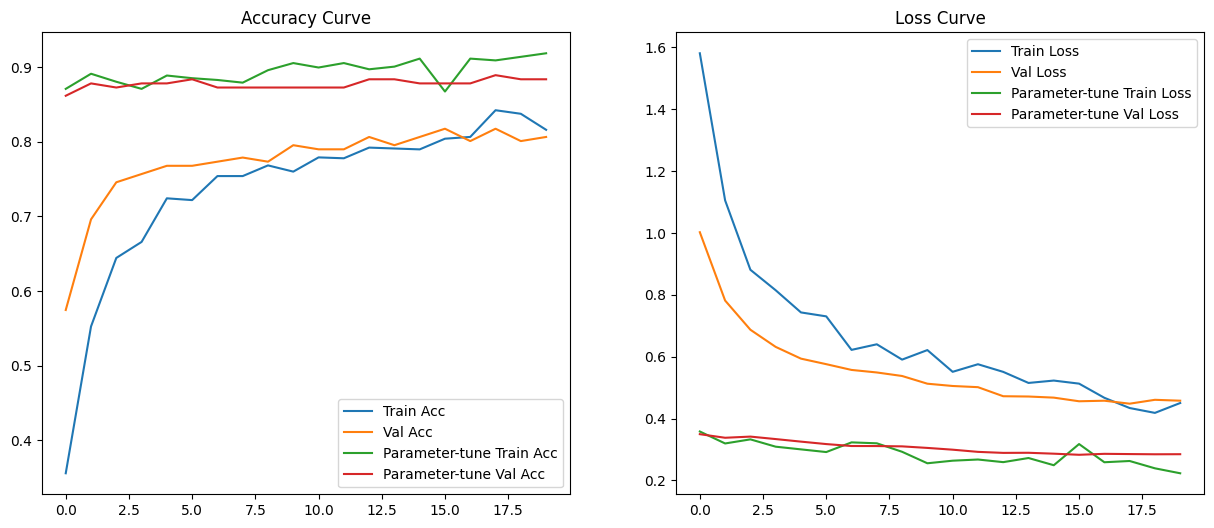

In [39]:
plt.figure(figsize=(15,6))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history_fine.history['accuracy'], label='Parameter-tune Train Acc')
plt.plot(history_fine.history['val_accuracy'], label='Parameter-tune Val Acc')
plt.legend()
plt.title("Accuracy Curve")

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history_fine.history['loss'], label='Parameter-tune Train Loss')
plt.plot(history_fine.history['val_loss'], label='Parameter-tune Val Loss')
plt.legend()
plt.title("Loss Curve")

plt.show()


In [40]:
# SAVE FINAL MODEL
model.save("skin_classifier_mobilenetv2.h5")
print("Model saved as skin_classifier_mobilenetv2.h5")

Model saved as skin_classifier_mobilenetv2.h5


In [41]:
import json

# Save class indices
with open("class_indices.json", "w") as f:
    json.dump(train_data.class_indices, f)

print("Saved class_indices.json")
print(train_data.class_indices)

Saved class_indices.json
{'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}


In [60]:
# Load trained MobileNetV2 skin classifier
model = tf.keras.models.load_model("skin_classifier_mobilenetv2.h5")

# Load class indices
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Reverse class dictionary → index → class name
classes = {v: k for k, v in class_indices.items()}
print("Loaded Classes:", classes)

Loaded Classes: {0: 'clear skin', 1: 'dark spots', 2: 'puffy eyes', 3: 'wrinkles'}


In [69]:
class_names = [
    "Clear Skin",
    "Dark Circles",
    "Puffy Eyes",
    "Wrinkles"
]

In [84]:
import cv2
import numpy as np

def safe_read_image(img_path):
    img = cv2.imread(img_path)
    
    if img is None:
        raise ValueError(f" Cannot read image: {img_path}")
    
    if img.size == 0:
        raise ValueError(f" Empty image array: {img_path}")
    
    return img

In [85]:
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

if face_cascade.empty():
    raise RuntimeError("Haar cascade not loaded")

In [86]:
def detect_faces(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(60, 60)
    )
    
    return faces

In [87]:
def preprocess_face(face_roi):
    face = cv2.resize(face_roi, (224, 224))
    face = face.astype("float32") / 255.0
    face = np.expand_dims(face, axis=0)
    return face

In [88]:
def predict_skin_issue(face_roi, model, class_names):
    processed = preprocess_face(face_roi)
    
    preds = model.predict(processed, verbose=0)
    class_index = np.argmax(preds)
    confidence = float(preds[0][class_index]) * 100
    
    return class_names[class_index], confidence

In [89]:
def run_inference(img_path, model, class_names):
    img = safe_read_image(img_path)
    
    faces = detect_faces(img)
    
    if len(faces) == 0:
        print("No face detected")
        return img
    
    for (x, y, w, h) in faces:
        face_roi = img[y:y+h, x:x+w]
        
        if face_roi.size == 0:
            continue
        
        class_name, confidence = predict_skin_issue(
            face_roi, model, class_names
        )
        
        # Draw bounding box
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        label = f"{class_name} ({confidence:.1f}%)"
        cv2.putText(
            img, label, (x, y-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6, (0, 255, 0), 2
        )
    
    return img

In [90]:
import matplotlib.pyplot as plt

def show_image(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()

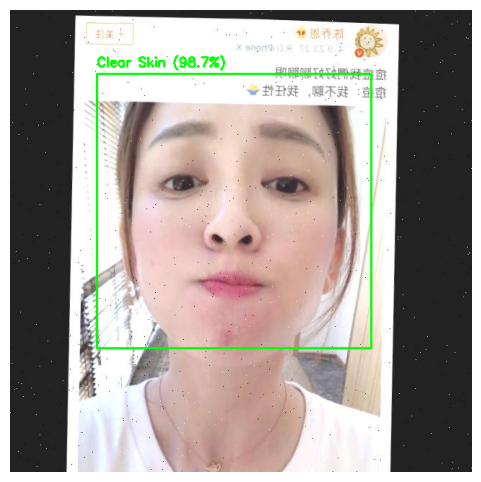

In [91]:
img_path = "/Users/brijesh/Desktop/AI_DermalScan/data/raw/clear skin/clear_skin_010.jpg"

output_img = run_inference(img_path, model, class_names)
show_image(output_img)